In [1]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
%matplotlib inline

Para el primer punto hemos de calcular la inercia de las diferentes configuraciones de clusters para identificar el punto donde hay mas diferencia. Ese será el número óptimo de clusters. 

In [2]:
#importamos los datos, los limpiamos y usamos únicamente los espcificados en el enunciado. 
data = pd.read_csv('dengue.csv')
data = data.dropna()
data = data.drop("Unnamed: 0",axis=1)
X = np.array(data[['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']])
#Los "Normalizamos"y trasnformamos.
datosEscalados = StandardScaler().fit(X).transform(X)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


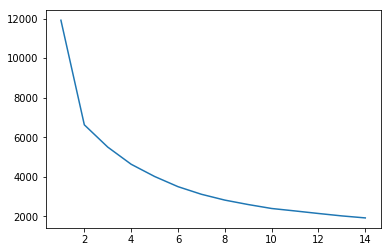

In [3]:
#Vamos en un primer tiempo, observa en que zona existe este brusco cambio. Por lo tanto intentaremos hasta 14 clusters.
x = np.arange(1,15)
print(x)
inercias = []
for i in x:
    cluster = KMeans(n_clusters=i)
    lanubecita = cluster.fit(datosEscalados)
    inerciaAca = cluster.inertia_
    inercias.append(inerciaAca)
    
#Hacemos una gráfica para visualizar los resultados
plt.plot(x,inercias)

Realizamos entonces que el número óptimo de clusters esta entre 1 y 4 clusters. Realicemos el mismo tratamiento pero enfocado en esta zona. 

[1 2 3 4]


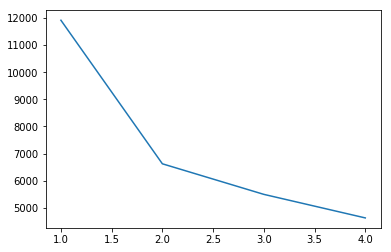

In [4]:
#Vamos en un segundo tiempo, observa en que zona existe este brusco cambio. Por lo tanto intentaremos hasta 4 clusters.
x = np.arange(1,5)
print(x)
inercias = []
for i in x:
    cluster = KMeans(n_clusters=i)
    lanubecita = cluster.fit(datosEscalados)
    inerciaAca = cluster.inertia_
    inercias.append(inerciaAca)
    
#Hacemos una gráfica para visualizar los resultados
plt.plot(x,inercias)

El cambio más brsco ocurre cuando pasamos a $\textbf{2}$ clusters. Este es, por lo tanto, el número óptimo de clusters. 

Para el segundo punto, hemos primero de importar los datos. Sin embargo, se realiza rápidamente que estos datos estan en diferentes formatos (tiempos, fechas, tipos de compra). Se utiliza entonces OneHotEncoder para procesar los datos. 

In [11]:
datos = pd.read_csv('BreadBasket_DMS.csv')
datos = datos.dropna()
Y = np.array(datos[['Date', 'Time' , 'Transaction', 'Item']])
#Lo que hace OneHotEncoder es mirar el número de categorias existentes y cada dato tendrá #PosiblesAtributos de columnas
enc= OneHotEncoder()
enc.fit(Y) 
#Vemos entonces que existen 4 categorias y que cada una tiene múltiples posiblidades. Un elemento se determinará como un
#array de unos y ceros donde los 1, determinan cada una de las caracteristicas que le corresponden. 
enc.categories_
Ytransformados = enc.transform(Y)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


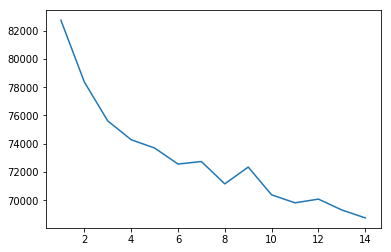

In [6]:
x = np.arange(1,15)
print(x)
inercias = []
for i in x:
    cluster = KMeans(n_clusters=i)
    lanubecita = cluster.fit(Ytransformados)
    inerciaAca = cluster.inertia_
    inercias.append(inerciaAca)
    
#Hacemos una gráfica para visualizar los resultados
plt.plot(x,inercias)

Nos damos entonces cuenta que el cambio es muy grande al pasar a 3 clusters. Se ajustaran los datos a dicha configuracion y obtendremos los siguientes conjuntos. 

In [8]:
cluster = KMeans(n_clusters=3)
lanubecita = cluster.fit(Ytransformados)
Centros = cluster.cluster_centers_
print(np.shape(Centros))

(3, 18025)


In [12]:
enc.inverse_transform(Centros)

array([['2017-02-04', '14:08:27', 6412, 'Tea'],
       ['2017-02-04', '10:45:21', 6560, 'Coffee'],
       ['2017-01-28', '08:37:55', 3058, 'Bread']], dtype=object)

In [14]:
datas = pd.read_csv('BreadBasket_DMS.csv')
datas = datas.dropna()
Y1 = np.array(datas[['Date', 'Time' , 'Transaction']])
atosEscalados = StandardScaler().fit(Y1).transform(Y1)
pca = PCA(n_components=2)
losDats = pca.fit(atosEscalados)
losexises = pca.transform(atosEscalados)
componentes = pca.components_.T

print(componentes[2])

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [ ]:
ig, ax = plt.subplots(figsize=(10,10))
ax.scatter(losexises[:,0],losexises[:,1], c='w')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
for a , b , c in zip(Nombres[:,0],-losexises[:,0],losexises[:,1]):
    ax.annotate(a , (b,c))
ax.arrow(0,0,2*componentes[0,0],2*componentes[0,1], head_width=0.05, head_length=0.05,ec='orange',length_includes_head = True)
ax.arrow(0,0,2*componentes[1,0],2*componentes[1,1], head_width=0.05, head_length=0.05,ec='orange',length_includes_head = True)
ax.arrow(0,0,2*componentes[2,0],2*componentes[2,1], head_width=0.05, head_length=0.05,ec='orange',length_includes_head = True)